In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opis zbioru

Name | Description
--- | ---
age | age of patient
sex | 1=male; 0=female
cp 	| chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic
trestbps | resting blood pressure (mm Hg)
chol | serum cholestrol (mg/dl)
fbs | fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise
restecg | resting electrocardiographic results: 0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left ventricular hypertrophy
thalach | maximum heart rate achieved
exang | exercise induced angina: 1=yes; 0=no
oldpeak | ST depression induced by exercise relative to rest
slope | the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
ca | number of major vessels (0-3) colored by flourosopy
thal | 3=normal; 6=fixed defect; 7=reversable defect
num | predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE

In [6]:
data = pd.read_csv('heart_disease_weka_dataset.csv')
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0  0.0  
1    2.0  3.0   3.0  1.0  
2    2.0  2.0   7.0  1.0  
3    3.0  0.0   3.0  0.0  
4    1.0  0.0   3.0  0.0

## One hot encoding dla kolumn *sex*, *cp*, *fbs*, *restecg*, *exang*, *slope*, *num*

In [3]:
def OHE(df, column_names):
    for column_name in column_names:
        one_hot = pd.get_dummies(df[column_name])
        one_hot = one_hot.add_suffix('_' + column_name + '_ohe')
        # df = df.drop(column_name, axis = 1)
        df = df.join(one_hot)
    return df

data = OHE(data, ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'num'])

In [4]:
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   ...  0.0_restecg_ohe  1.0_restecg_ohe  2.0_restecg_ohe  0.0_exang_ohe  \
0  ...                0                0                1              1   
1  ...                0                0                1              0   
2  ...                0                0                1              0   
3  ...                1                0                0              1   
4  ...                0                0                1              1   

   1.0_exang_ohe  1.0_slope_ohe  2.0_slope_ohe  3.0_slope_ohe  0.0_num_ohe  \
0              0              0              0              1            1   
1              1              0              1              0            0   
2              1              0              1              0            0   
3              0              0              0              1            1   
4              0              1              0              0            1   

   1.0_num_ohe  
0            0  
1            1  
2            1  
3            0  
4            0  

[5 rows x 32 columns]

## Rozkłady zmiennych ciągłych

### Spoczynkowe ciśnienie krwi *trestbps*

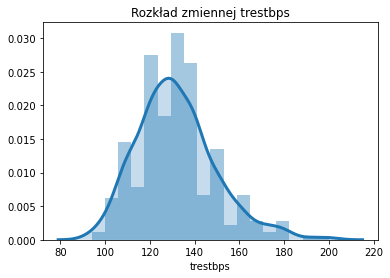

In [5]:
plot_dens=sns.distplot(data.trestbps, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
tmp = plot_dens.set_title('Rozkład zmiennej trestbps')

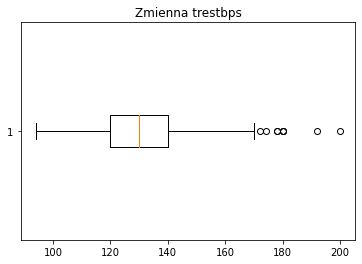

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zmienna trestbps')
tmp = ax1.boxplot(data.trestbps, vert=False)

Wart zauważenia wydaje się fakt, że znaczne odchyły występują po prawej stronie wykresu. Widać to delikatnie w przypadku histogramu, ale wyraźnie na boxplot'cie.

### Cholesterol w surowicy *chol*

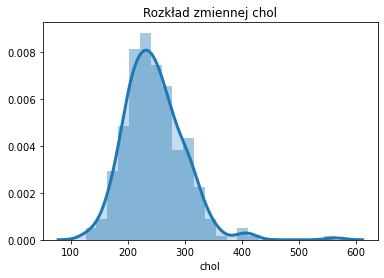

In [7]:
plot_dens=sns.distplot(data.chol, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
tmp = plot_dens.set_title('Rozkład zmiennej chol')

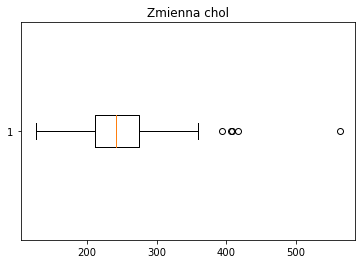

In [8]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zmienna chol')
tmp = ax1.boxplot(data.chol, vert=False)

Sytuacja podobna do poprzedniej. Mamy dodatkowo jedną obserwację znacznie odchyloną od reszty. Powinno się jej przyjrzeć indywidualnie - to może być błąd w danych.

### Maksymalne tętno *thalach*

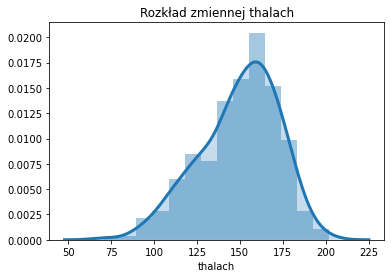

In [9]:
plot_dens=sns.distplot(data.thalach, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
tmp = plot_dens.set_title('Rozkład zmiennej thalach')

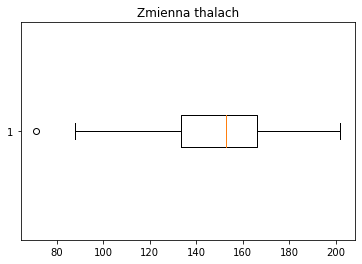

In [10]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zmienna thalach')
tmp = ax1.boxplot(data.thalach, vert=False)

### Obniżenie ST wywołane wysiłkiem w stosunku do odpoczynku *oldpeak*

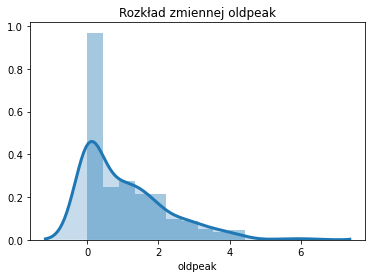

In [11]:
plot_dens=sns.distplot(data.oldpeak, hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
tmp = plot_dens.set_title('Rozkład zmiennej oldpeak')

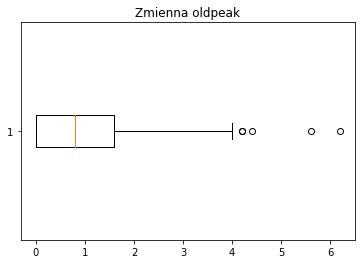

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_title('Zmienna oldpeak')
tmp = ax1.boxplot(data.oldpeak, vert=False)

Można zauważyć, że zmienna przyjmuje wartości od 0 do ~6. Na podstawie histogramu normą jest raczej wartość z przedziału 0-1.

### Zmienne kategoryczne

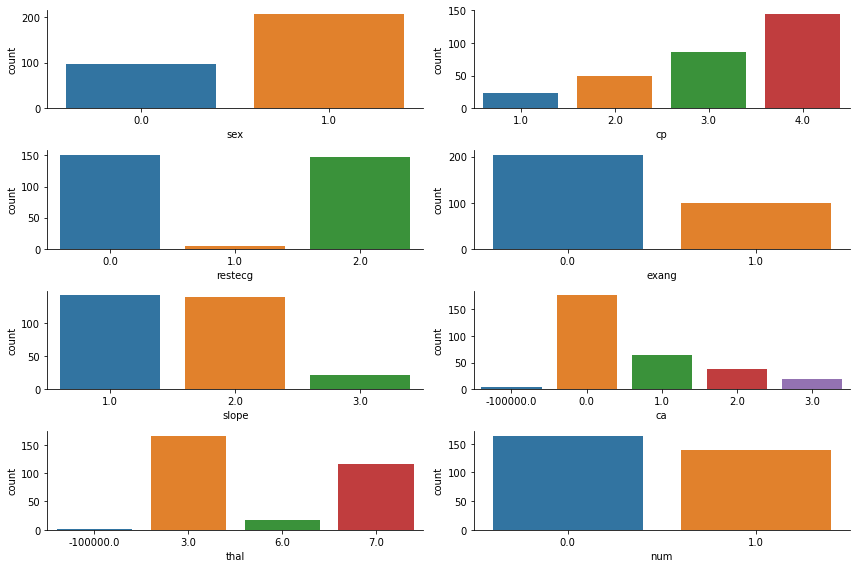

In [13]:
categorical = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical[idx], data=data)
sns.despine()
plt.tight_layout()
plt.show()

Wygląda na to, że -100000 to brak danych. Należy to wyeliminować, gdyż może nam zaburzyć wynik.

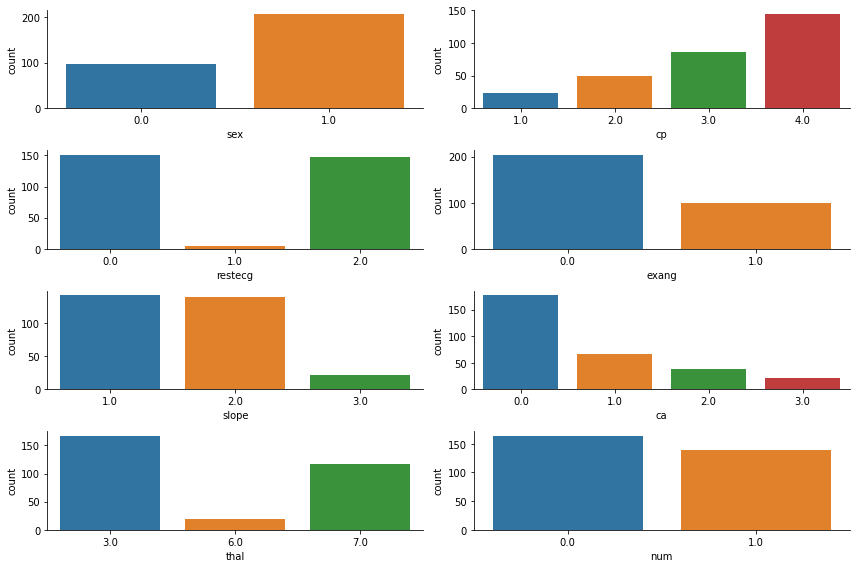

In [14]:
data = data.replace(-100000.0, None)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical[idx], data=data)
sns.despine()
plt.tight_layout()
plt.show()

## Zależności między zmiennymi

### Zależności między zmiennymi ciągłymi *trestbps*, *chol*, *thalach*, *oldpeak*

/home/aur/anaconda3/envs/wum1/lib/python3.8/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


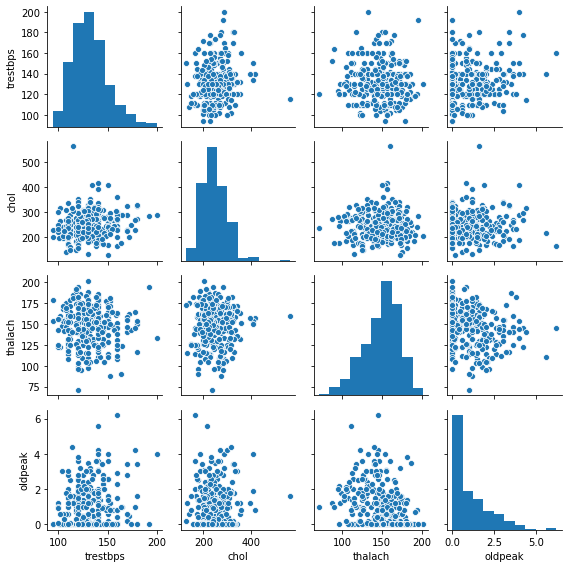

In [15]:
continuous = ['trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(data.loc[:,continuous], size=2)
plt.tight_layout()

Raczej nie widać żadnych szczególnych zależności

### Rozkład w zależności od zmiennej kategorycznej

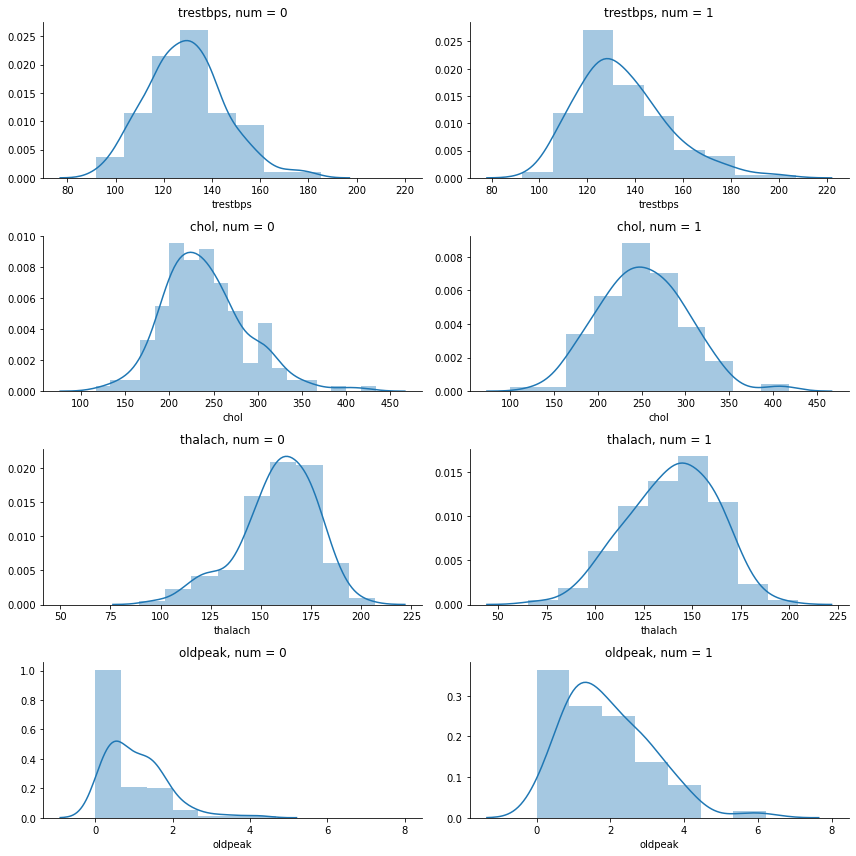

In [16]:
fig, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(12, 12))
axes = axes.flatten()
ranges = {'trestbps': [80, 220], 'chol': [100, 450], 'thalach': [50, 220], 'oldpeak': [0, 8]}
for idx, ax in enumerate(axes):
    plt.sca(ax)
    tmp = idx % 2
    param = continuous[idx // 2]
    ax = sns.distplot(data[data['num'] == tmp][param], hist_kws={'range': ranges[param]}, kde_kws={'clip': ranges[param]})
    ax.title.set_text(param + ', num = ' + str(tmp))
sns.despine()
plt.tight_layout()
plt.show()

Zdrowi zdecydowanie częściej mają wyższe wartości parametru *oldpeak*. Zdrowi mają też wartości *chol* przesunięte bardziej w prawą stronę.

## Zbadanie korelacji

Dla uzyskania lepszych wyników, unormalizujemy dane.

In [17]:
normalized_data = data.copy()
def normalize(df, column):
    df[column] = df[column] / df[column].max()

for tmp in continuous:
    normalize(normalized_data, tmp)

normalize(normalized_data, 'age')
    
normalized_data.head()

age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.818182  1.0  1.0     0.725  0.413121  1.0      2.0  0.742574    0.0   
1  0.870130  1.0  4.0     0.800  0.507092  0.0      2.0  0.534653    1.0   
2  0.870130  1.0  4.0     0.600  0.406028  0.0      2.0  0.638614    1.0   
3  0.480519  1.0  3.0     0.650  0.443262  0.0      0.0  0.925743    0.0   
4  0.532468  0.0  2.0     0.650  0.361702  0.0      2.0  0.851485    0.0   

    oldpeak  ...  0.0_restecg_ohe  1.0_restecg_ohe  2.0_restecg_ohe  \
0  0.370968  ...                0                0                1   
1  0.241935  ...                0                0                1   
2  0.419355  ...                0                0                1   
3  0.564516  ...                1                0                0   
4  0.225806  ...                0                0                1   

   0.0_exang_ohe  1.0_exang_ohe  1.0_slope_ohe  2.0_slope_ohe  3.0_slope_ohe  \
0              1              0              0              0              1   
1              0              1              0              1              0   
2              0              1              0              1              0   
3              1              0              0              0              1   
4              1              0              1              0              0   

   0.0_num_ohe  1.0_num_ohe  
0            1            0  
1            0            1  
2            0            1  
3            1            0  
4            1            0  

[5 rows x 32 columns]

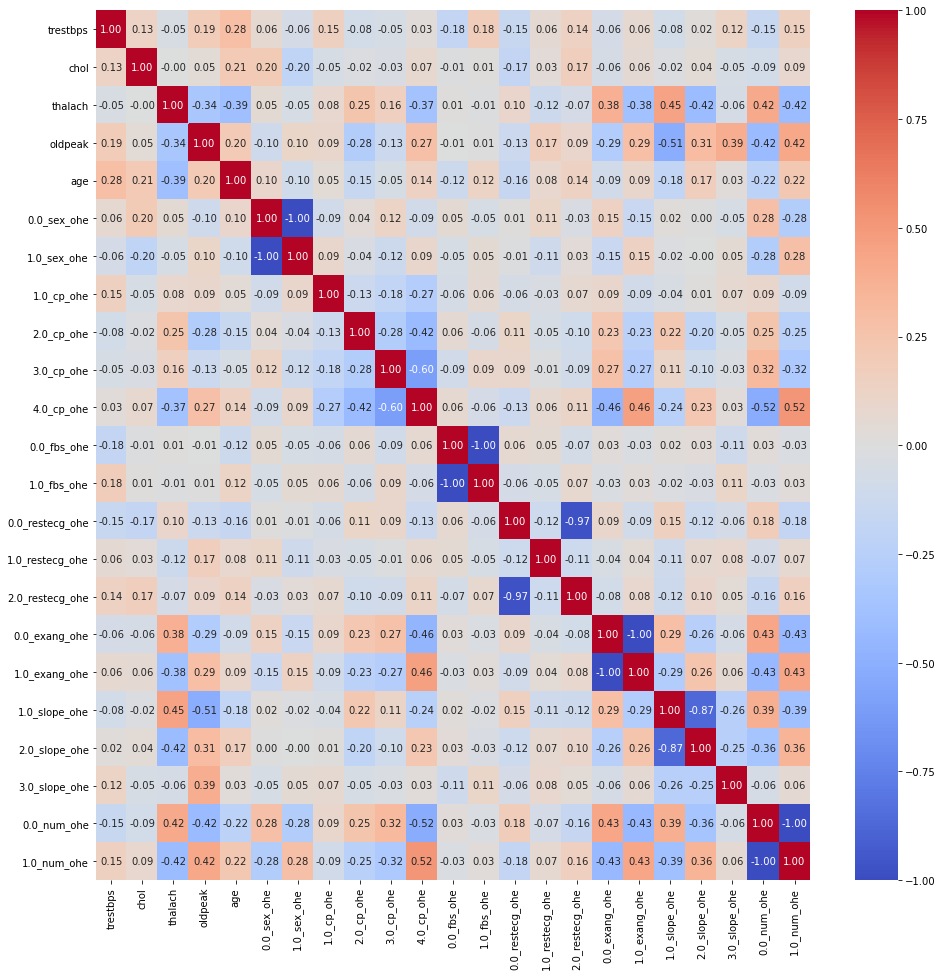

In [18]:
plt.figure(figsize=(16,16))
columns = continuous + ['age', '0.0_sex_ohe', '1.0_sex_ohe', '1.0_cp_ohe', '2.0_cp_ohe', '3.0_cp_ohe', '4.0_cp_ohe',
       '0.0_fbs_ohe', '1.0_fbs_ohe', '0.0_restecg_ohe', '1.0_restecg_ohe',
       '2.0_restecg_ohe', '0.0_exang_ohe', '1.0_exang_ohe', '1.0_slope_ohe',
       '2.0_slope_ohe', '3.0_slope_ohe', '0.0_num_ohe', '1.0_num_ohe']
sns.heatmap(data.loc[:,columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Możemy zauważyć, że choroba serca jest dość mocno skorelowana z wartością współczynników *thalach*, *oldpeak*, *cp* (w przypadku wartości 4), *exang* i *slope*.

## Lens

Dużym plusem narzędzia jest to, że samo wykrywa typ danych. Nie trzeba ręcznie dzielić ich na ciągłe i kategorie. Wykorzystajmy to na "czystych" danych.

In [9]:
import lens
data = pd.read_csv('heart_disease_weka_dataset.csv')
ls = lens.summarise(data)
explorer = lens.explore(ls)
explorer.describe()


### Zbadajmy kilka kolumn

In [10]:
explorer.column_details('thalach')

In [11]:
explorer.column_details('cp')

### Porównajmy wykres korelacji

In [12]:
explorer.correlation()

Tutaj wychodzi dość spore ograniczenie narzędzia. Przy próbie wyplotowania wykresu przy pomocy `explorer.correlation_plot()` wyskakują błędy, niestety rozwiązania ze stackoverflow nie zadziałały w moim przypadku. Podobne błędy wyskakują w przypadku próby plotowania również innych statystyk - błąd widoczny jest poniżej.


Kolejne, co się rzuca w oczy, to mimo że narzędzie rozpoznaje typ zmiennych, to przy liczeniu korelacji nie robi *one hot encoding*, przez co tracimy trochę informacji.

### Badanie korelacji

In [13]:
import plotly
plotly.offline.init_notebook_mode()
explorer.pairwise_density_plot('num', 'thalach')

AttributeError: module 'plotly.offline.offline' has no attribute '__PLOTLY_OFFLINE_INITIALIZED'

Jak widać, znowu pojawił się ten sam problem. Spróbujmy zatem użyć pandas-profiling

## Pandas profiling

In [3]:
from pandas_profiling import ProfileReport

data = pd.read_csv('heart_disease_weka_dataset.csv')

profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [4]:
profile.to_notebook_iframe()

Pakiet wygląda nieco bardziej ubogo. Co prawda na początku wyświetla braki danych i korelacje, ale moim zdaniem jest za mało wykresów. Na plus zdecydowanie jest prostota (wywołanie jednej funkcji, reszta to klikanie) i różne wskaźniki korelacji.

## Podsumowanie

Niestety *lens* nie jest widziany przez condę, przez to miałam dużo problemów z zależnościami i kod do *pandas-profiling* i *lens* wywoływałam na różnych virtualenvach.